In [33]:
import pandas as pd
import numpy as np
import collections
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [60]:
df_users = pd.read_csv('E:/datasets/relax_challenge/takehome_users.csv', encoding='latin-1')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [61]:
#Convert the time columns to datetime
df_users.creation_time = pd.to_datetime(df_users.creation_time)
df_users.last_session_creation_time = pd.to_datetime(df_users.last_session_creation_time, unit='s')

In [62]:
engagement_df = pd.read_csv('E:/datasets/relax_challenge/takehome_user_engagement.csv', encoding='latin-1')
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [14]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [63]:
#Convert time column to datetime
engagement_df.time_stamp = pd.to_datetime(engagement_df.time_stamp)

In [64]:
adopted_dict = {x:False for x in range(1, len(df_users)+1)}

for group in engagement_df.groupby('user_id'):
    
    #Define useful vars
    user_id = group[0]
    user_times = group[1]['time_stamp'].sort_values().reset_index(drop=True)
    num_engage = len(user_times)
    
    #If there are less than 3 engagements, they do not qualify
    if num_engage < 3:
        continue
     
    #Iterate over the engagement timestampe
    for i, stamp in enumerate(user_times):
        
        #Ensure we don't go off the end of the array of timestamps
        if i == num_engage-2:
            break
            
        #Define useful timestamp vars    
        start = stamp
        end = start + pd.Timedelta('7D')
        next1 = user_times[i+1]
        next2 = user_times[i+2]
        
        #Are the next two timestamps within a week?
        if (next1 < end) & (next2 < end):
            adopted_dict[user_id] = True
            break    
            
print('There are %i adopted users.' % sum(adopted_dict.values()))

There are 1602 adopted users.


In [88]:
#print(adopted_dict.items())

In [65]:
#Convert dict of adopted users to dataframe for easy merge
adopted_df = pd.DataFrame(adopted_dict.items(), columns=['object_id', 'adopted'])

#Merge the adopted user info to users dataframe
df_users = pd.merge(df_users, adopted_df, on='object_id')

In [66]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


In [92]:
adopted_user_len = len((df_users[df_users['adopted']== True]).index)/len(df_users)
print('Precentage of adopted users {:1.1%}'.format(adopted_user_len))

Precentage of adopted users 13.4%


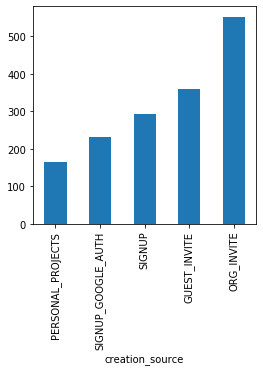

In [99]:
df_users[df_users['adopted'] == True].groupby('creation_source')['adopted'].size().sort_values(0).plot(kind='bar', figsize = (4,4))

In [74]:
non_engaged = pd.DataFrame({'creation_source':df_users['creation_source'].iloc[df_users[df_users['adopted'] == False].index],\
                           'adopted':df_users[df_users['adopted'] == False].index})


Text(0.5, 1.0, 'Non adoptable users')

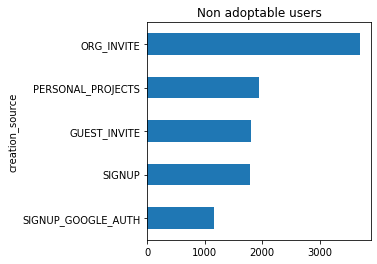

In [101]:
non_engaged.groupby('creation_source')['adopted'].size().sort_values(0).plot(kind='barh', figsize = (4,4))
plt.title('Non adoptable users')

In [95]:
invited_by_others = df_users[df_users['adopted']== True].invited_by_user_id.notnull().sum()/len(df_users[df_users['adopted']== 1])
non_invited_by_others = df_users[df_users['adopted']== False].invited_by_user_id.notnull().sum()/len(df_users[df_users['adopted']== 0])
print('Adopted users invited by other users {:1.1%}'.format(invited_by_others))
print('Not adopted users invited by other users {:1.1%}'.format(non_invited_by_others))

Adopted users invited by other users 57.0%
Not adopted users invited by other users 52.9%


In [96]:
opted_mail_len = len(df_users[(df_users['adopted']== True) & (df_users['opted_in_to_mailing_list']== 1)].index)/len(df_users[df_users['adopted']== True])
non_opted_mail_len = len(df_users[(df_users['adopted']== False) & (df_users['opted_in_to_mailing_list']== 1)].index)/len(df_users[df_users['adopted']== False])
print('Adopted users who opted in mailing list {:1.1%}'.format(opted_mail_len))
print('Then non-adopted users who opted in mailing list {:1.1%}'.format(non_opted_mail_len))

Adopted users opted in mailing list 25.8%
Not adopted users opted in mailing list 24.8%


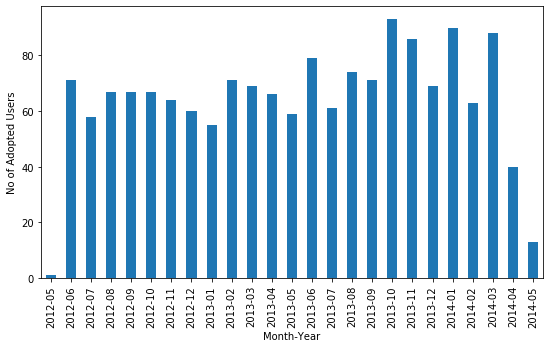

In [98]:
df_users['date'] = pd.to_datetime(df_users['creation_time'].dt.date)
df_users['month'] = df_users['date'].dt.strftime('%Y-%m')
df_users.groupby('month')['adopted'].sum().plot(kind='bar', figsize=(9,5))
plt.xlabel('Month-Year')
plt.ylabel('Fraction of Adopted Users')
plt.show()

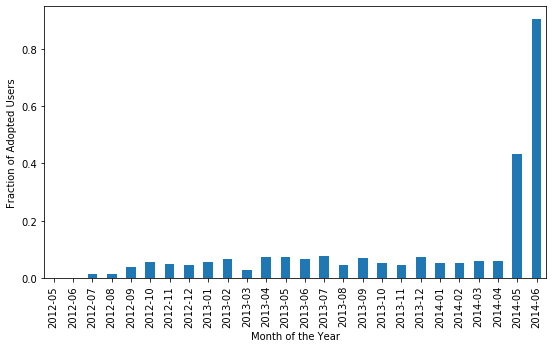

In [87]:
df_users['date'] = pd.to_datetime(df_users['last_session_creation_time'].dt.date)
df_users['month'] = df_users['date'].dt.strftime('%Y-%m')
df_users.groupby('month')['adopted'].mean().plot(kind='bar', figsize=(9,5))
plt.xlabel('Month-Year')
plt.ylabel('Fraction of Adopted Users')
plt.show()

### Inferences:
1)In the entire dataset only 13.4% were adopted users. Some plots were made to understand the behaviour of adopted users. Based on the creation source it seems that most people signed up because of organization invite. A vast number of Adopted users also signed up because of guest invite were as many non-adoptable users signed up due to personal projects. 
2)50 % of the users were invited by other users. Only 25% of users opted in mailing list and 15% for marketing drip showing that both adoptable and non-adoptable users shows a similar trend. 
3)A plot is made for the number of adopted use vs month. It seems that few months have done better than other months in particular October 2013. Also there is many adopted users in 2014-06. Since the sign-up is an on going process some users might still become sdoptable but the time series is truncated after a length of time.